In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="notebook")
%matplotlib inline

In [2]:
data_path = '../data/original/train.csv'
df = pd.read_csv(data_path)
df.head()

,name,description,property_type,price,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_time,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,reviews
0,Bed-Stuy 2 Bed/2 Bath - Renovated,"Welcome to Bed-Stuy, Brooklyn! Our newly renov...",Entire rental unit,4,Bedford-Stuyvesant,Brooklyn,40.684560,-73.939870,2015-05-23 00:00:00,within a day,...,2024-08-10 00:00:00,5.00,5.00,4.97,5.0,5.0,4.71,4.94,0.52,"Barry's place was perfect. It was cute, modern..."
1,Victorian Flatbush Oasis,"Lovely nonsmoking annex in Brooklyn's ""secret ...",Private room in rental unit,3,Flatbush,Brooklyn,40.638991,-73.965739,2023-09-14 00:00:00,within an hour,...,2024-09-02 00:00:00,4.83,4.87,4.93,4.8,4.9,4.90,4.63,3.81,I booked this place last minute to attend a fu...
2,Bay Ridge Metroscape: Inviting NYC Studio Living,This studio presents unparalleled convenience ...,Entire rental unit,3,Fort Hamilton,Brooklyn,40.618810,-74.032380,2022-07-31 00:00:00,within an hour,...,2024-08-17 00:00:00,4.60,4.80,4.20,4.8,4.8,4.80,4.20,2.14,Great spot! Little far out but overall a great...
3,"New HDTV room, 20 minutes to Manhattan #724",- Furnished room in a newly renovated apartmen...,Private room in rental unit,0,Crown Heights,Brooklyn,40.673970,-73.953990,2012-08-11 00:00:00,within an hour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Just What You Were Looking For! Pets Allowed,This modern property in Manhattan is just step...,Room in hotel,2,Midtown,Manhattan,40.747180,-73.985390,2014-12-23 00:00:00,within an hour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
non_numerical_df = df.select_dtypes(exclude=['int64', 'float64'])
unique_values_count = non_numerical_df.nunique().sort_values(ascending=False)
unique_values_count.reset_index(name="Unique Count").head(20)

,index,Unique Count
0,name,15189
1,amenities,13314
2,description,12687
3,reviews,11215
4,host_since,4037
5,first_review,3261
6,last_review,1390
7,neighbourhood_cleansed,217
8,property_type,59
9,bathrooms_text,30


In [5]:
all_amenities = df['amenities'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.split(', ').explode().unique().tolist()

all_amenities

['Dishwasher',
 'Single level home',
 'Stove',
 'Smoke alarm',
 '49 inch HDTV with Amazon Prime Video',
 'Apple TV',
 'Disney+',
 'HBO Max',
 'Hulu',
 'Netflix',
 'Roku',
 'Central air conditioning',
 'Cooking basics',
 'Heating',
 'Private patio or balcony',
 'Exterior security cameras on property',
 'Refrigerator',
 'Long term stays allowed',
 'Kitchen',
 'Hair dryer',
 'Hot water',
 'Free street parking',
 'Iron',
 'Private entrance',
 'Fire extinguisher',
 'Microwave',
 'Essentials',
 'Smart lock',
 'Carbon monoxide alarm',
 'Hangers',
 'Shampoo',
 'Dishes and silverware',
 'Oven',
 'Bathtub',
 'Self check-in',
 'First aid kit',
 'Coffee maker',
 'Wifi',
 'Dining table',
 'Mini fridge',
 'TV',
 'Patio or balcony',
 'Coffee',
 'Outdoor dining area',
 'Hot water kettle',
 'Conditioner',
 'Clothing storage: dresser',
 'Ethernet connection',
 'Body soap',
 'Portable heater',
 'Central heating',
 'Pets allowed',
 'Bed linens',
 'Freezer',
 'Electric stove',
 'Lockbox',
 'Air conditionin

In [ ]:
print(df['property_type'].unique())
print(df['bathrooms_text'].unique())
print(df['bathrooms'].unique())

['Entire rental unit' 'Private room in rental unit' 'Room in hotel'
 'Private room in home' 'Private room in condo'
 'Shared room in rental unit' 'Private room in serviced apartment'
 'Entire guest suite' 'Entire townhouse' 'Private room in loft'
 'Entire serviced apartment' 'Private room in townhouse'
 'Entire guesthouse' 'Entire vacation home' 'Entire home' 'Entire place'
 'Entire condo' 'Entire loft' 'Private room in guest suite'
 'Private room in bungalow' 'Room in boutique hotel' 'Room in aparthotel'
 'Private room in bed and breakfast' 'Entire bungalow'
 'Private room in casa particular' 'Shared room in guest suite'
 'Private room in resort' 'Entire villa' 'Private room in kezhan'
 'Private room' 'Shared room in home' 'Entire cottage'
 'Private room in guesthouse' 'Camper/RV' 'Boat' 'Private room in hostel'
 'Shared room in hostel' 'Houseboat' 'Shared room in serviced apartment'
 'Shared room in vacation home' 'Private room in ranch'
 'Private room in camper/rv' 'Room in serviced

In [43]:
selected_columns = [
    'property_type', 'bathrooms_text', 'host_verifications',
    'neighbourhood_group_cleansed', 'room_type', 'host_response_time',
    'host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
    'instant_bookable', 'has_availability'
]

filtered_df = df[selected_columns]

for column in selected_columns:
    print(f"Unique values for '{column}':")
    print(filtered_df[column].unique())
    print("\n" + "-"*50 + "\n")

Unique values for 'property_type':
['Entire rental unit' 'Private room in rental unit' 'Room in hotel'
 'Private room in home' 'Private room in condo'
 'Shared room in rental unit' 'Private room in serviced apartment'
 'Entire guest suite' 'Entire townhouse' 'Private room in loft'
 'Entire serviced apartment' 'Private room in townhouse'
 'Entire guesthouse' 'Entire vacation home' 'Entire home' 'Entire place'
 'Entire condo' 'Entire loft' 'Private room in guest suite'
 'Private room in bungalow' 'Room in boutique hotel' 'Room in aparthotel'
 'Private room in bed and breakfast' 'Entire bungalow'
 'Private room in casa particular' 'Shared room in guest suite'
 'Private room in resort' 'Entire villa' 'Private room in kezhan'
 'Private room' 'Shared room in home' 'Entire cottage'
 'Private room in guesthouse' 'Camper/RV' 'Boat' 'Private room in hostel'
 'Shared room in hostel' 'Houseboat' 'Shared room in serviced apartment'
 'Shared room in vacation home' 'Private room in ranch'
 'Private r

In [44]:
train_data_path = '../data/processed_history/train_2.csv'
train_df = pd.read_csv(train_data_path)

test_data_path = '../data/processed_history/test_2.csv'
test_df = pd.read_csv(test_data_path)

predictive_data_path = '../data/processed_history/predictive_2.csv'
predictive_df = pd.read_csv(predictive_data_path)

In [ ]:
train_df_dropped = train_df.drop(columns=['price'])
test_df_dropped = test_df.drop(columns=['price'])
predictive_df_dropped = predictive_df.drop(columns=['id'])

common_columns = train_df_dropped.columns.intersection(test_df_dropped.columns).intersection(predictive_df_dropped.columns)

train_df_final = train_df_dropped[common_columns]
test_df_final = test_df_dropped[common_columns]
predictive_df_final = predictive_df_dropped[common_columns]

df = pd.concat([train_df_final, test_df_final, predictive_df_final], ignore_index=True)
df.head()

,latitude,longitude,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,...,streaming_services,refrigerator,microwave,wifi,housekeeping,garden,parking,gym,view,kitchen
0,40.796320,-73.963690,100.0,73.0,19.0,52.0,15,15,0,0,...,0,0,1,1,0,0,0,0,0,1
1,40.798650,-73.951931,27.0,35.0,14.0,24.0,5,0,4,1,...,0,1,1,1,0,0,0,0,0,1
2,40.719970,-73.995100,100.0,66.0,3.0,7.0,3,3,0,0,...,0,1,0,1,0,0,0,0,0,1
3,40.683596,-73.829863,100.0,100.0,1.0,1.0,1,0,1,0,...,0,1,1,1,0,0,0,0,0,1
4,40.762160,-73.992930,100.0,25.0,2.0,6.0,2,2,0,0,...,0,1,1,1,0,0,0,0,0,1


In [ ]:
original_max_columns = pd.get_option('display.max_columns')

pd.set_option('display.max_columns', None)

print(df.describe())

pd.set_option('display.max_columns', original_max_columns)

           latitude     longitude  host_response_rate  host_acceptance_rate  \
count  22423.000000  22423.000000        22423.000000          22423.000000   
mean      40.727101    -73.943218           91.400977             78.598070   
std        0.058685      0.060046           20.700484             26.009253   
min       40.500366    -74.251907            0.000000              0.000000   
25%       40.685490    -73.982986           91.279996             71.000000   
50%       40.725730    -73.952397          100.000000             86.000000   
75%       40.762765    -73.921430          100.000000            100.000000   
max       40.911390    -73.713650          100.000000            100.000000   

       host_listings_count  host_total_listings_count  \
count         22423.000000               22423.000000   
mean            292.836686                 398.995228   
std             992.048744                1213.443044   
min               1.000000                   1.000000   
25%

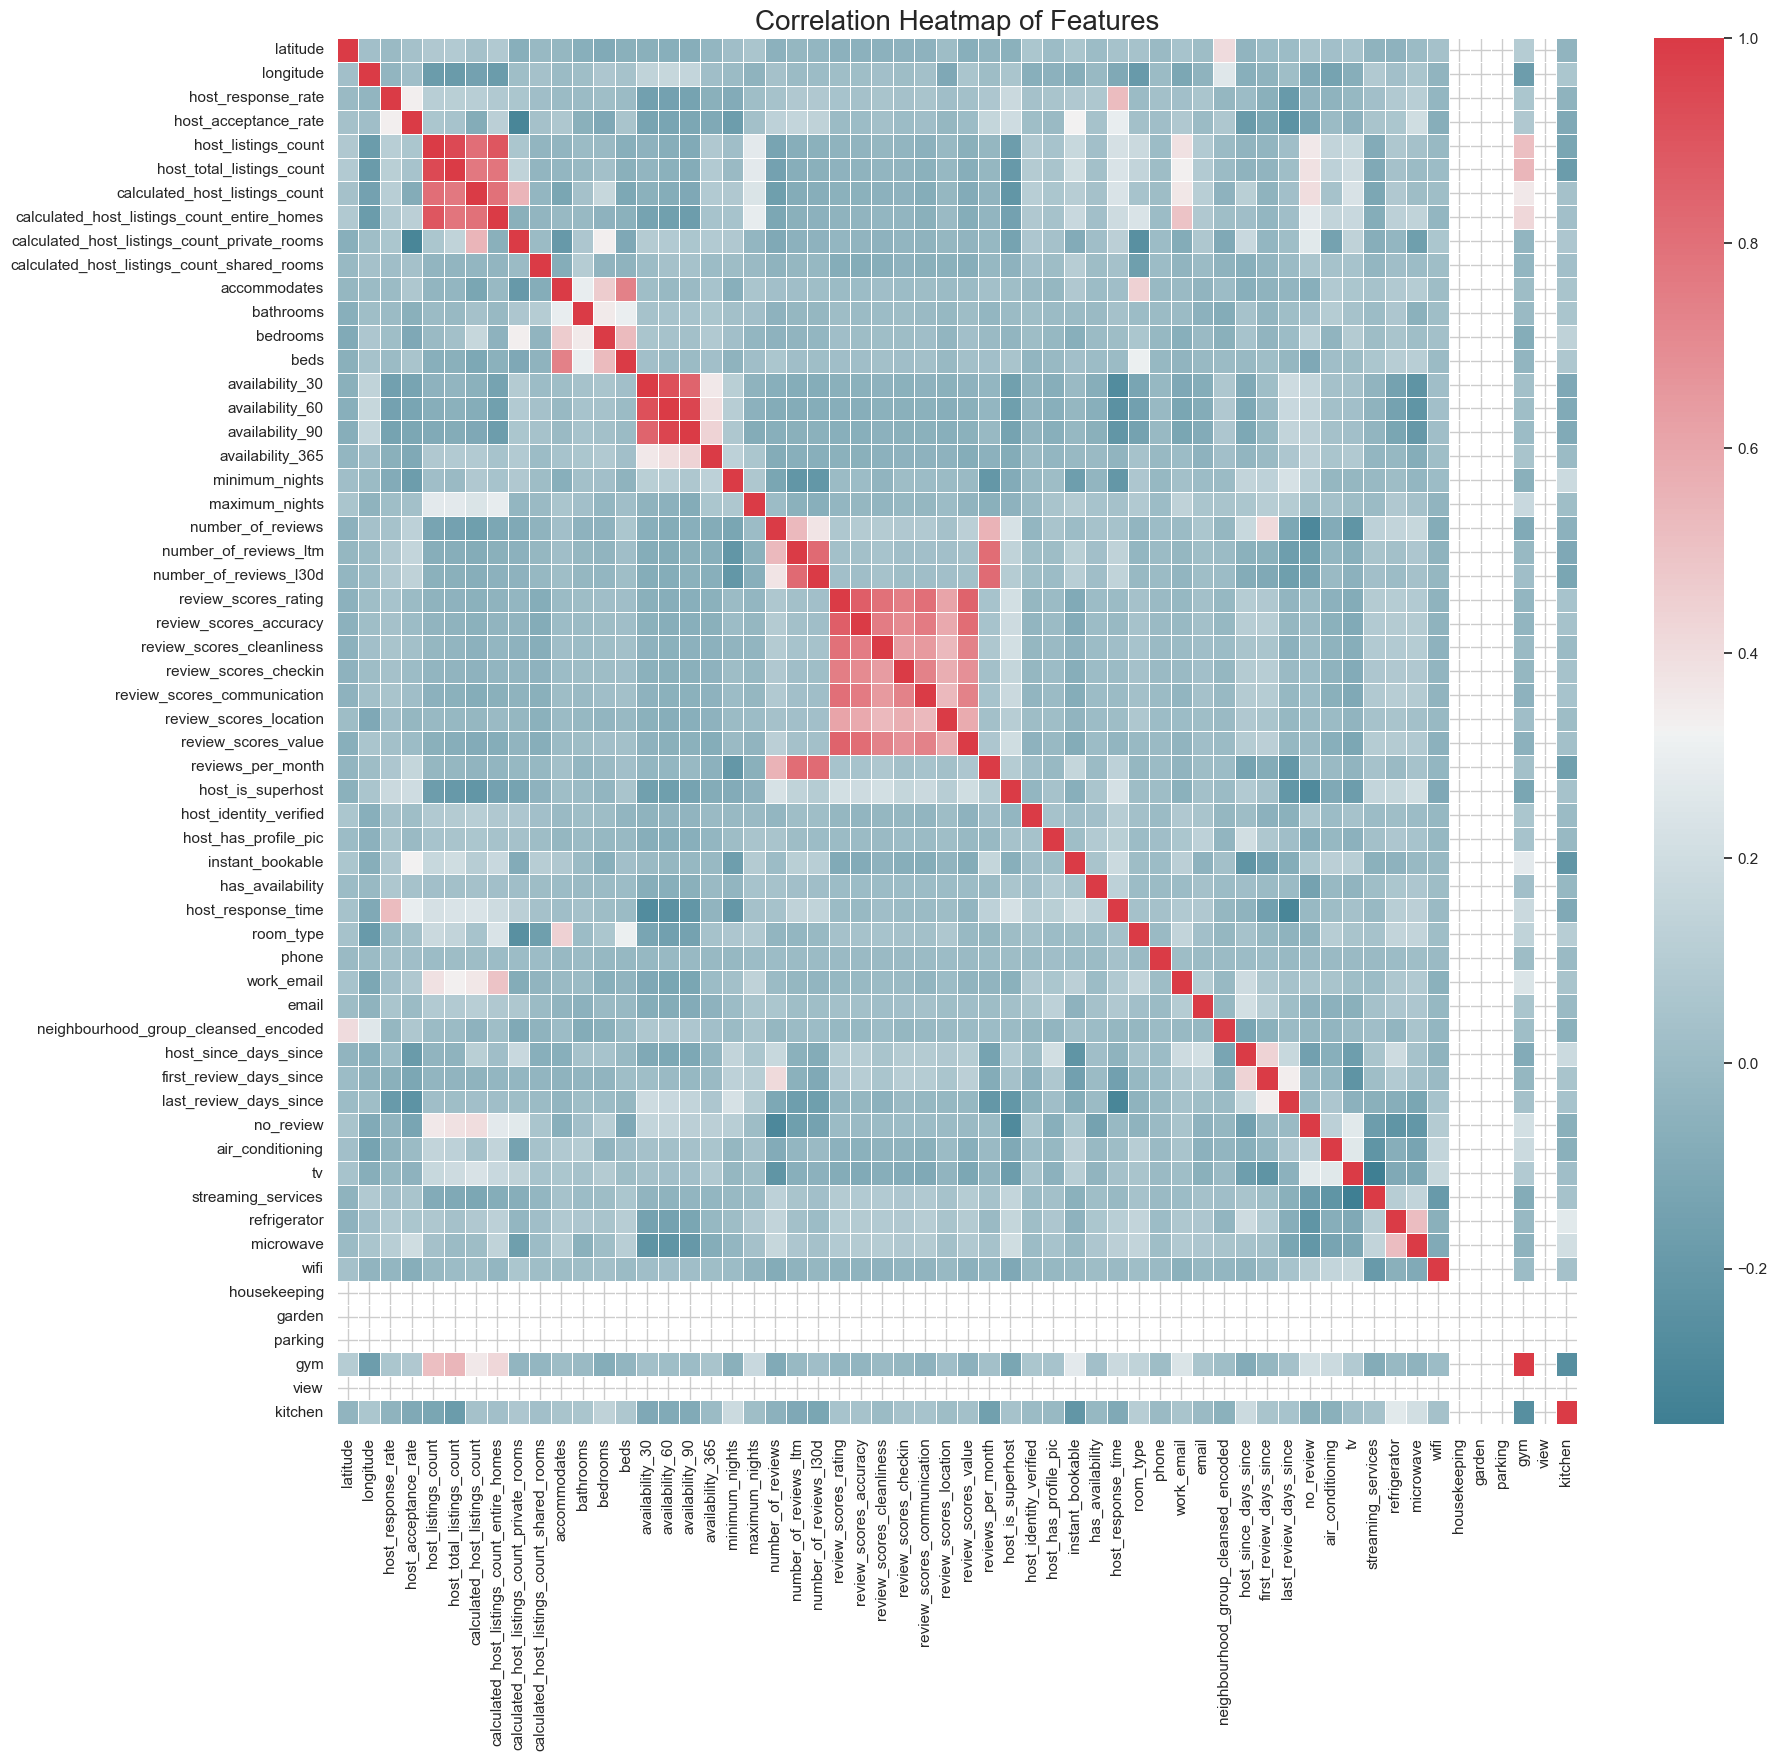

In [47]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=False, cmap=cmap, linewidths=.5)
plt.title('Correlation Heatmap of Features', fontsize=20)
plt.show()

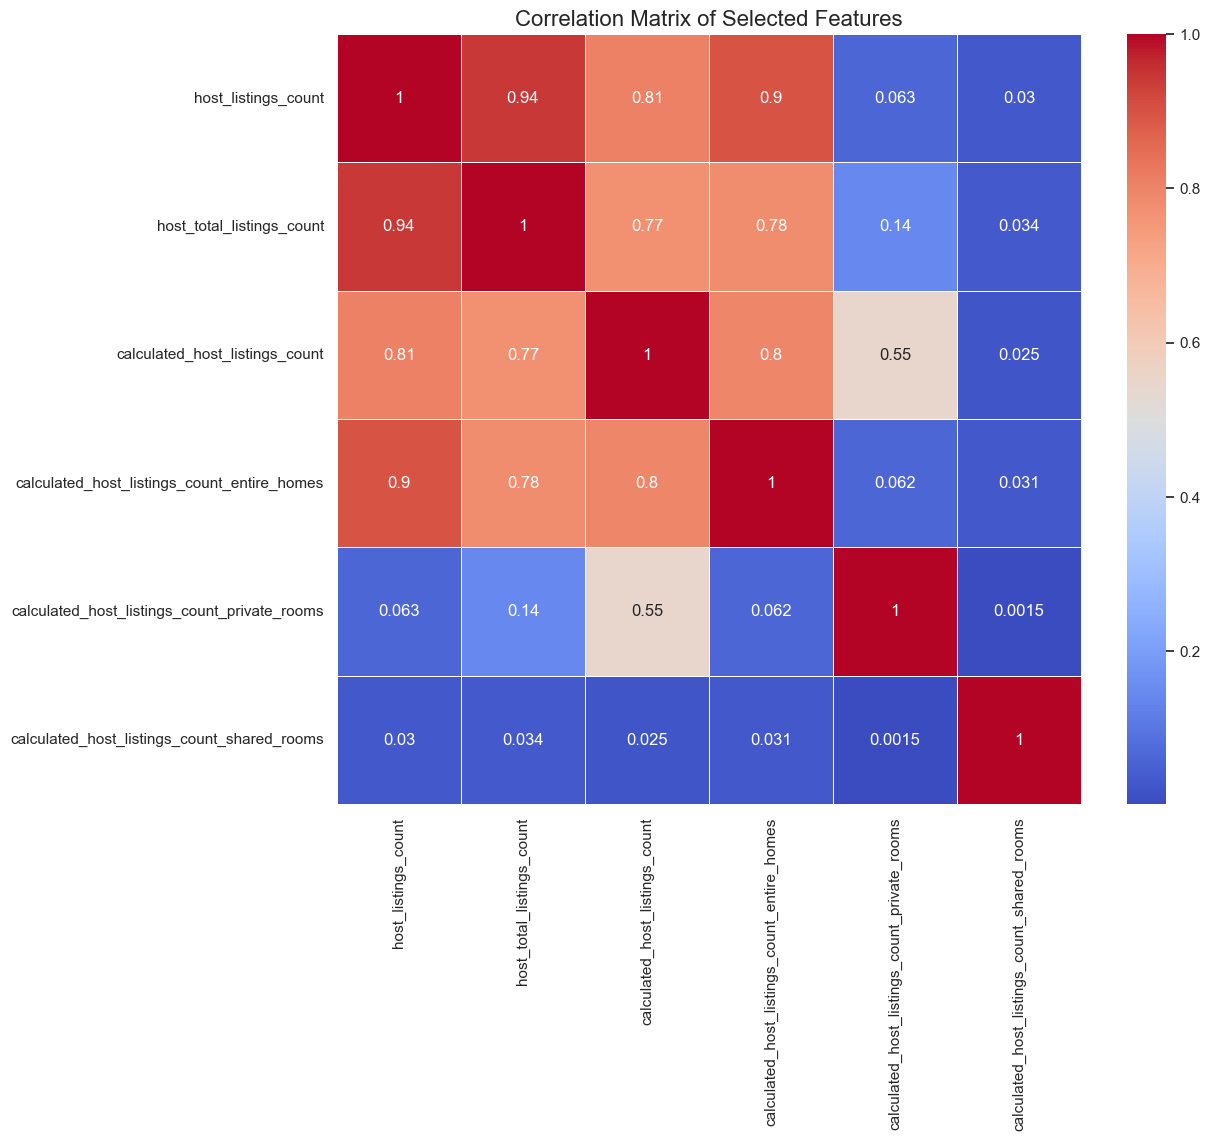

In [ ]:
features_listings = ['host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']

selected_corr = df[features_listings].corr().abs()
plt.figure(figsize=(12, 10))
sns.heatmap(selected_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features', fontsize=16)
plt.show()

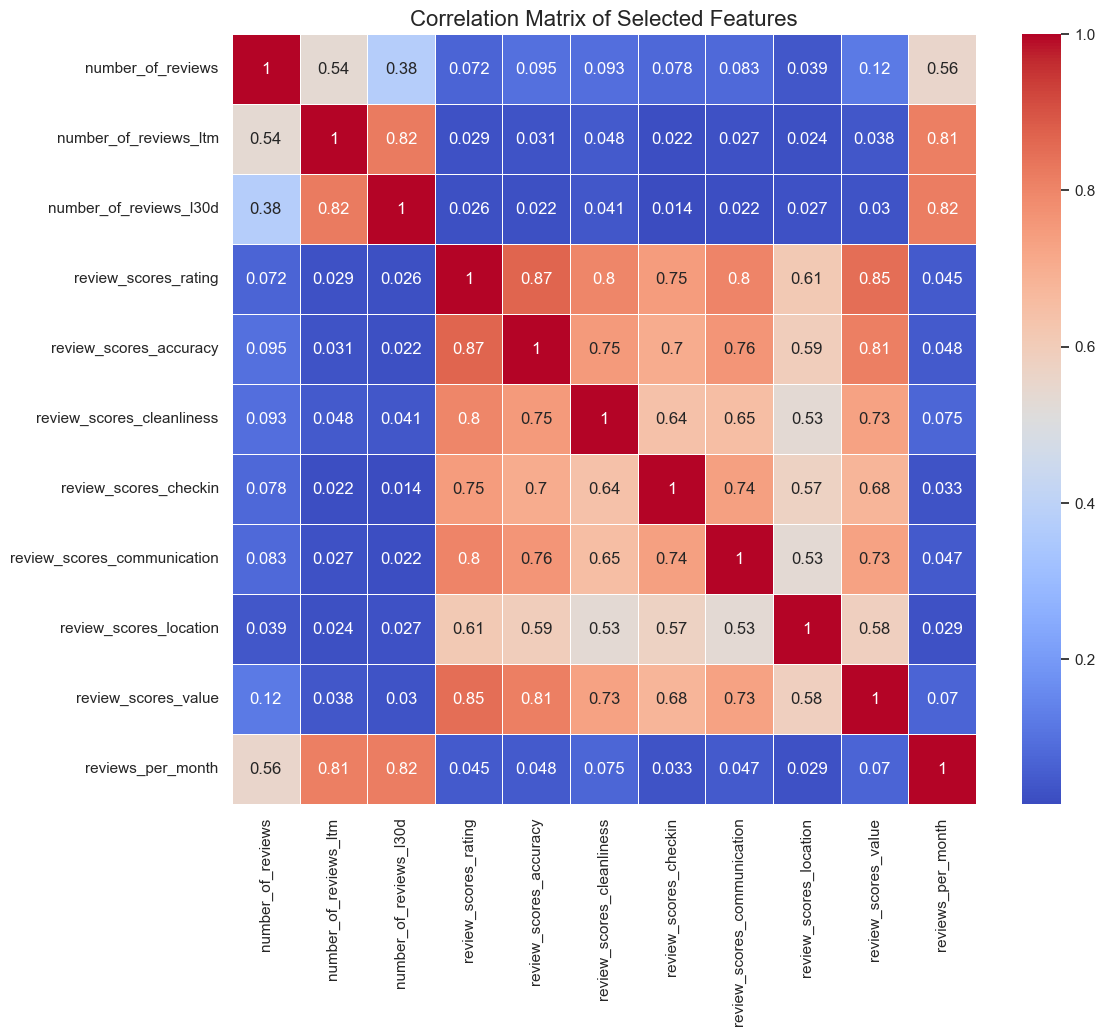

In [52]:
features_reviews = ["number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month"]

selected_corr = df[features_reviews].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(selected_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features', fontsize=16)
plt.show()

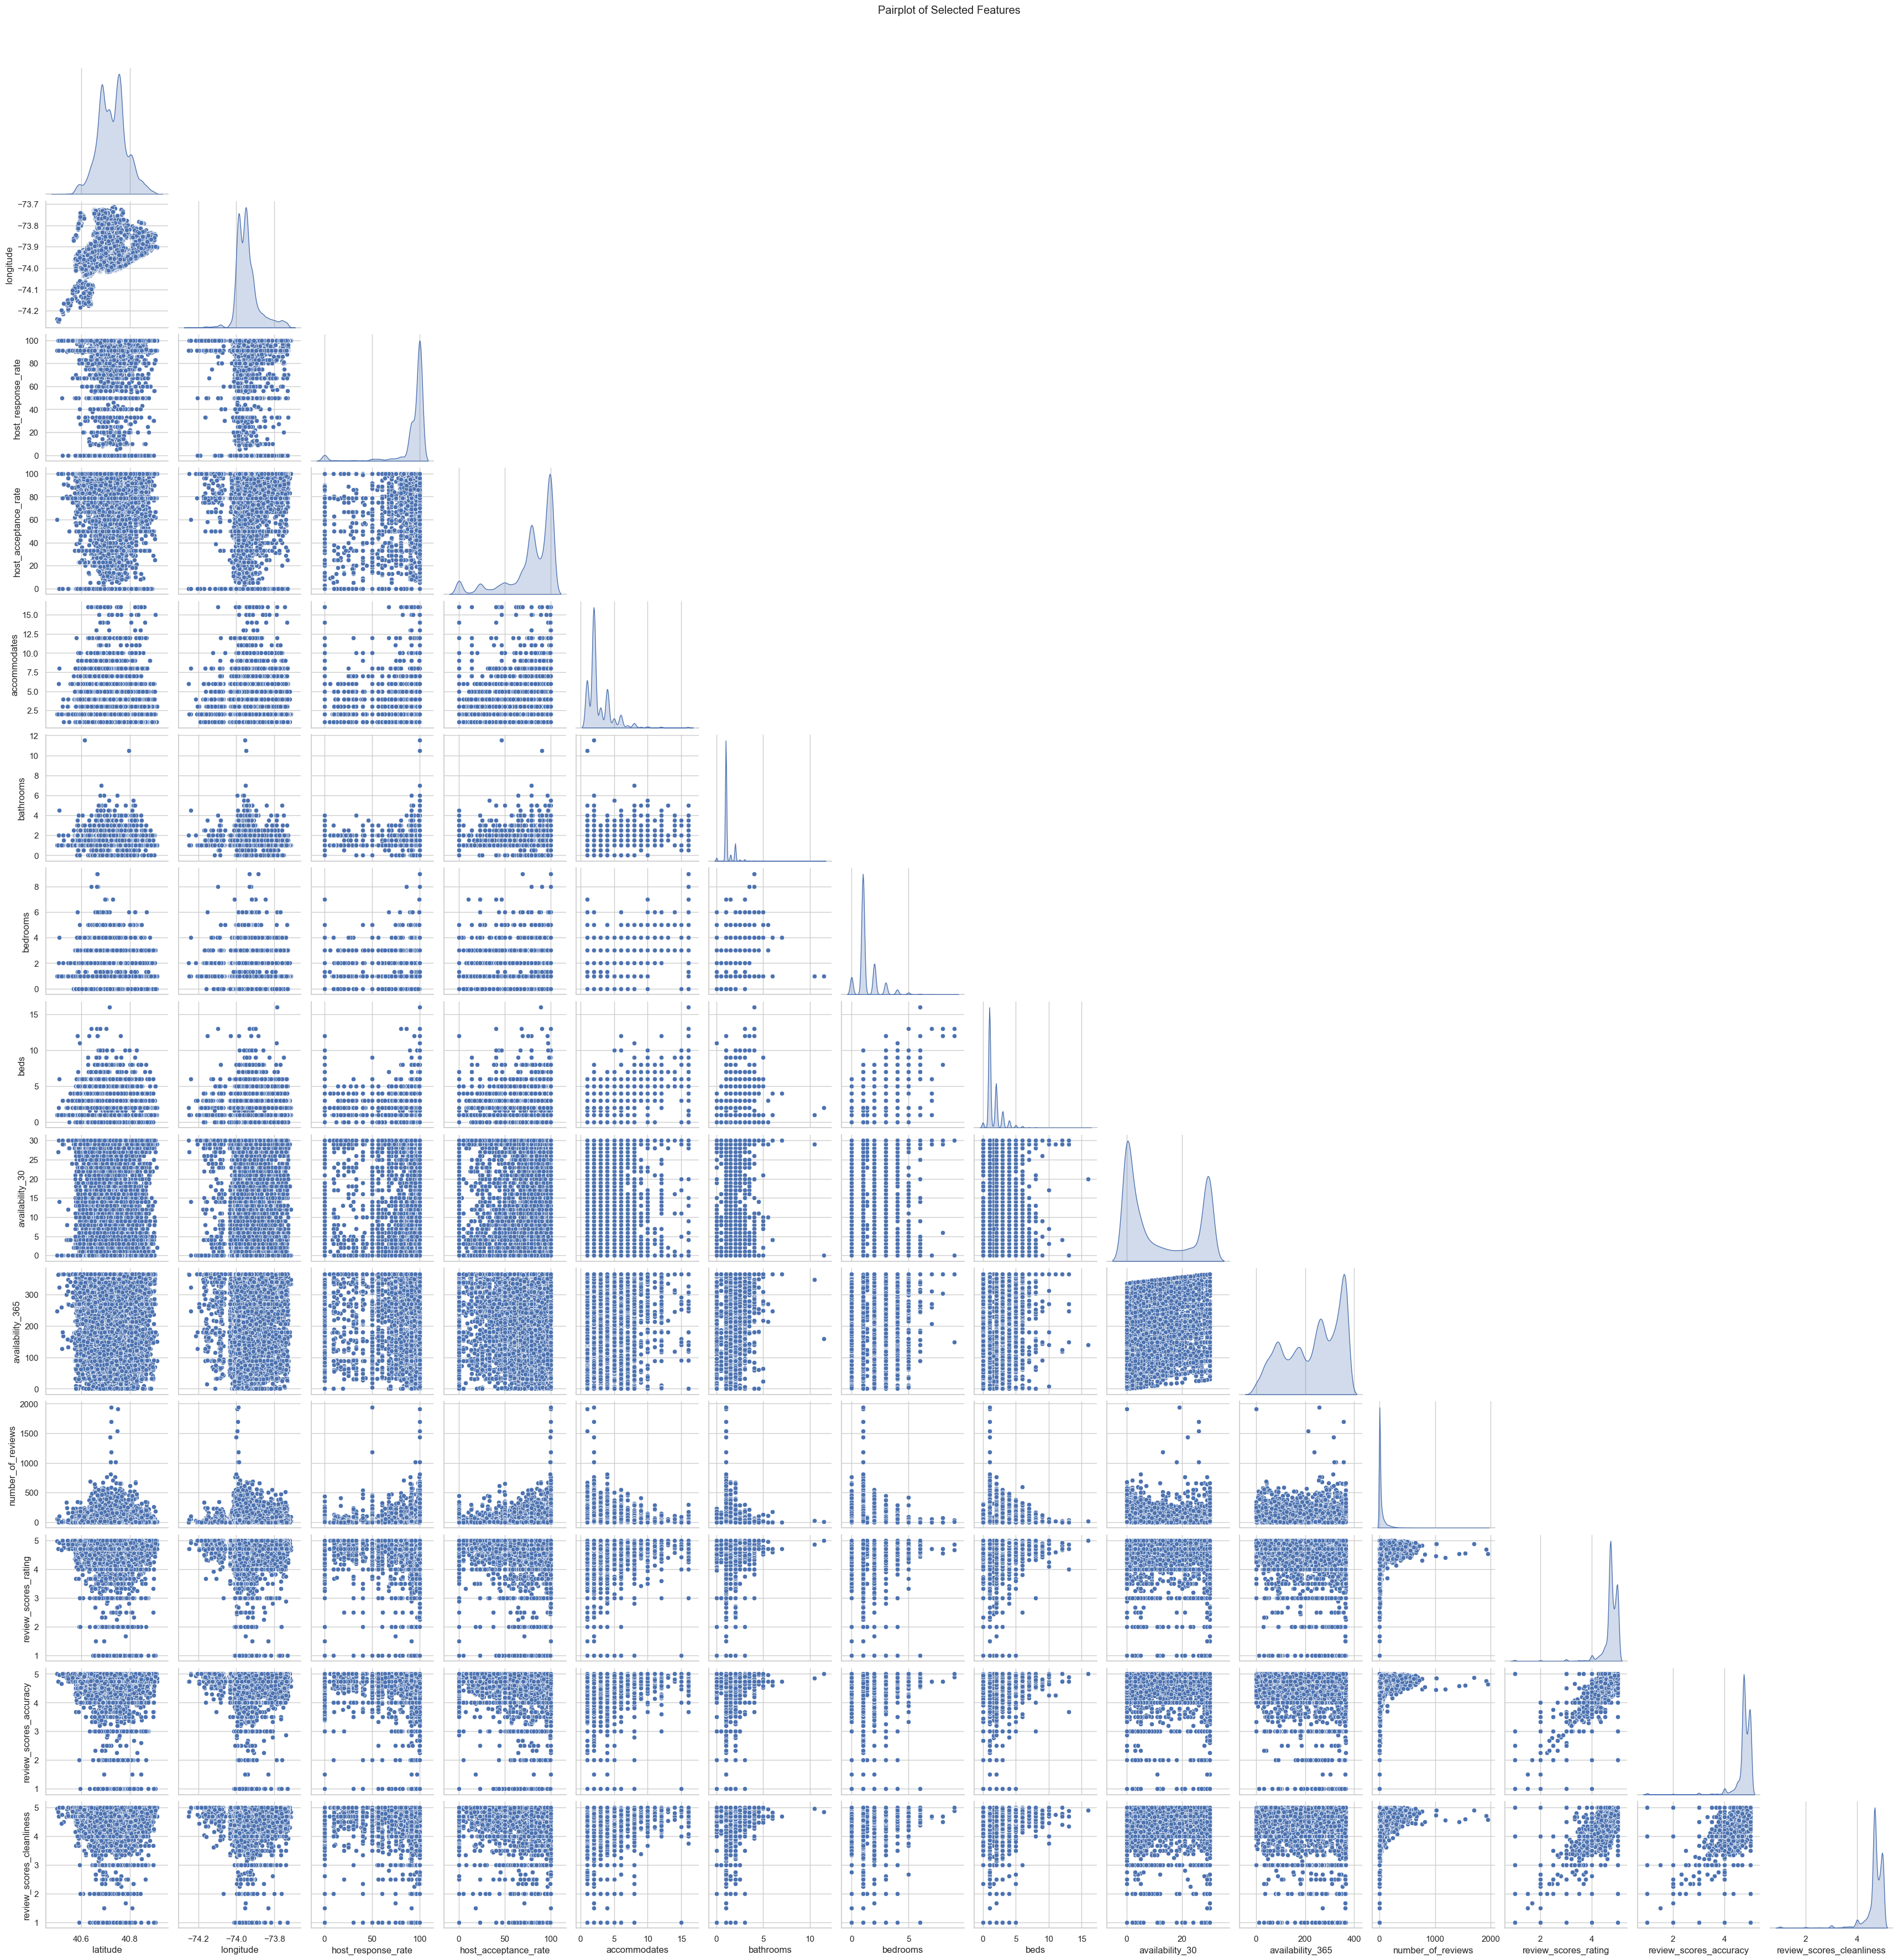

In [49]:
sns.pairplot(df[selected_features].dropna(), diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

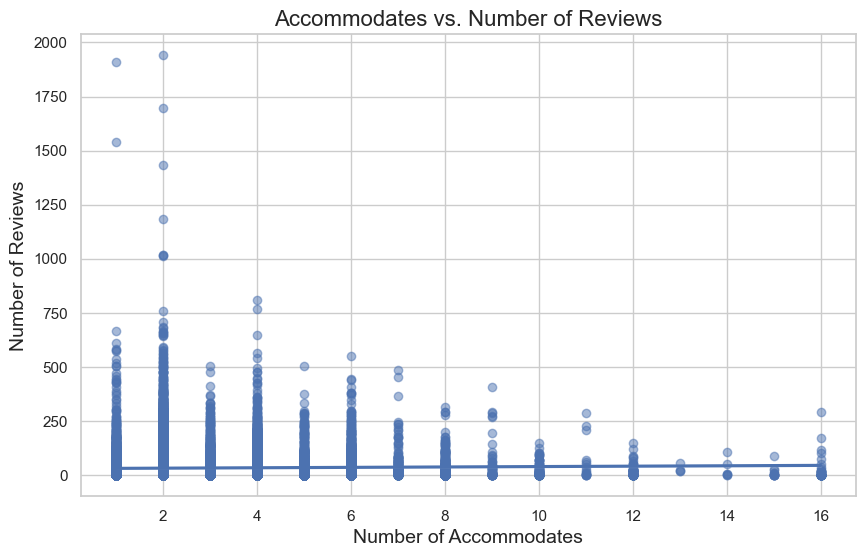

In [50]:
plt.figure(figsize=(10, 6))
sns.regplot(x='accommodates', y='number_of_reviews', data=df, scatter_kws={'alpha':0.5})
plt.title('Accommodates vs. Number of Reviews', fontsize=16)
plt.xlabel('Number of Accommodates', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.show()